In [ ]:
# 패션 mnist 데이터에 배치사이즈를 적용해보기
# tensorflow

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical

# Fashion-MNIST 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

# 신경망 데이터 넣기전에 데이터 정규화( 값의 범위를 0~1 로 만들어 줍니다.)
x_train = x_train / 255
x_test = x_test / 255 

# 라벨을 one hot encoding 해준다. 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 훈련 데이터에 대한 검정을 위해 validatation 데이터를 만든다.
# 테스트 데이터는 나중에 시험볼때 사용할 것이므로 그냥 두고
# 훈련 데이터만 7대3 으로 분리 합니다. 
import  tensorflow as tf

from sklearn.model_selection import train_test_split

tf.random.set_seed(777)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print(x_train.shape)

x_train=x_train.reshape(-1,28*28)
print(x_train.shape)

x_val = x_val.reshape(-1,28*28)
print(x_val.shape)

x_test = x_test.reshape(-1, 28*28)
print(x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(42000, 28, 28)
(42000, 784)
(18000, 784)
(10000, 784)


배치 사이즈 100

In [ ]:
# 3. 모델을 구성합니다.


from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers    import  Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784, ) ) ) # 은닉1층
model.add(Dense( 10, activation='softmax') ) 

# 4. 모델을 설정합니다. (경사하강법과 오차함수를 정의해줍니다. 4장에서 배웁니다)

model.compile(optimizer='adam',  # 경사하강법 
                     loss='categorical_crossentropy',  #오차함수
                     metrics=['acc'] )  # 학습과정에서 정확도를 보려고 지정

# 5. 모델을 훈련 시킵니다.


history1 = model.fit(x_train, y_train, 
                        epochs = 30, 
                        batch_size = 100, 
                        validation_data = (x_val, y_val))


#model.fit( 훈련데이터, 정답, 에폭수, 배치사이즈) 
# 에폭수 :  학습횟수 (책을 몇번 볼건지)
# 배치사이즈:  한번에 학습할 양 ( 사람은 책을 한번에 한페이지 밖에 못보지만 컴퓨터는 한번에
#                  여러 페이지를 볼 수 있다)

# 6. 모델을 평가합니다. (시험을 봅니다.)

model.evaluate(x_test, y_test) 

배치사이즈 500

In [ ]:
# 3. 모델을 구성합니다.


from  tensorflow.keras.models  import  Sequential
from  tensorflow.keras.layers    import  Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784, ) ) ) # 은닉1층
model.add(Dense( 10, activation='softmax') ) 

# 4. 모델을 설정합니다. (경사하강법과 오차함수를 정의해줍니다. 4장에서 배웁니다)

model.compile(optimizer='adam',  # 경사하강법 
                     loss='categorical_crossentropy',  #오차함수
                     metrics=['acc'] )  # 학습과정에서 정확도를 보려고 지정

# 5. 모델을 훈련 시킵니다.


history2 = model.fit(x_train, y_train, 
                        epochs = 30, 
                        batch_size = 500, 
                        validation_data = (x_val, y_val))


#model.fit( 훈련데이터, 정답, 에폭수, 배치사이즈) 
# 에폭수 :  학습횟수 (책을 몇번 볼건지)
# 배치사이즈:  한번에 학습할 양 ( 사람은 책을 한번에 한페이지 밖에 못보지만 컴퓨터는 한번에
#                  여러 페이지를 볼 수 있다)

# 6. 모델을 평가합니다. (시험을 봅니다.)

model.evaluate(x_test, y_test) 

두 모델을 같이 시각화

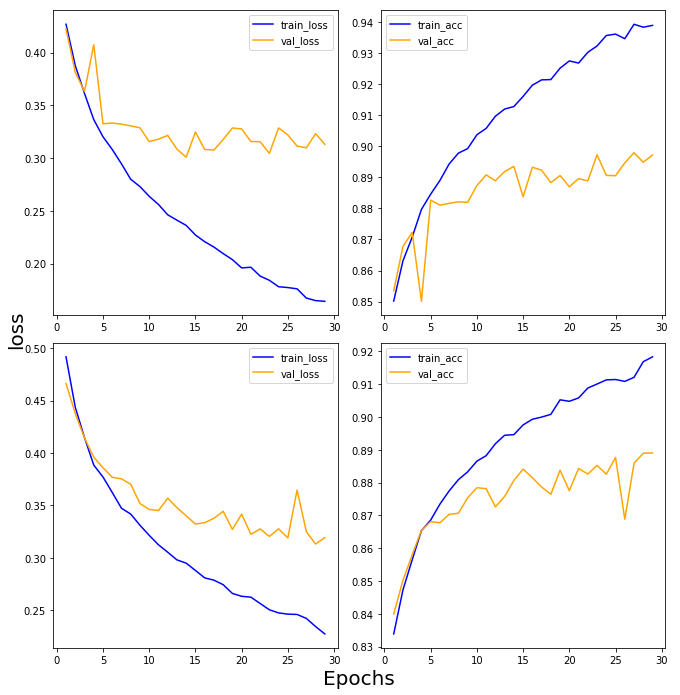

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    
    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(history1, history2, 30)

# 설명 : 훈련을 할때는 항상 훈련 데이터와 검증 데이터의 정확도를 같이 볼 수 있게 해야합니다.
# 그래야 나중에 진짜 real 테스트 데이터의 정확도를 어느정도 가늠할 수 있게 됩니다.


# 설명 : 둘다 똑같이 30 에폭을 사는동안 배치 사이즈 100보다 배치 사이즈 500 정확도가 더 떨어진
# 		이유는 아마도 배치 사이즈 500이 배치사이즈 100보다 local mininum 에 빠졌을때
# 		헤어 나오느라 시간이 더 걸렸기 때문입니다.

# 두 모델의 정확도를 시각화 해보면 쉽게 알 수 있다.
# 위쪽은 배치사이즈 100 , 아래쪽은 배치사이즈 500
